## Sorular:
### 1. Hangi meyve en yüksek C vitamini içeriğine sahiptir? Diğer bazı C vitamini kaynakları nelerdir?
### 2. Bir gıda maddesinin kalorisi ve su içeriği arasındaki ilişkiyi açıklayın.
### 3. Sıfır karbonhidrat diyetinin olası sakıncaları nelerdir? Çok yüksek proteinli bir diyetin sakıncaları neler olabilir?
### 4. Bir gram yağ yaklaşık 9 kilokalori, bir gram protein ve bir gram karbonhidrat ise 4'er kilokalori içerir. Bu tahminlerin verilerle uyumlu olup olmadığını test etmek için doğrusal bir model kurun.
### 5. Gıdalardaki gizli kalori kaynaklarının neler olabileceğini görmek için doğrusal modelinizin hatalarını analiz edin.

# Keşifçi Veri Analizi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv("data.csv")
df=df.set_index("FDC_ID")
pd.set_option('display.max_colwidth', None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 167512 to 168362
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Item          4166 non-null   object
 1   Category      4166 non-null   object
 2   Calories      4166 non-null   object
 3   Protein       4166 non-null   object
 4   Carbohydrate  4166 non-null   object
 5   Total fat     4166 non-null   object
 6   Cholesterol   3872 non-null   object
 7   Fiber         3814 non-null   object
 8   Water         4166 non-null   object
 9   Alcohol       2956 non-null   object
 10  Vitamin C     3890 non-null   object
dtypes: object(11)
memory usage: 390.6+ KB


In [4]:
df.head()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
FDC_ID,,,,,,,,,,,
167512,"""Pillsbury Golden Layer Buttermilk Biscuits, Artificial Flavor, refrigerated dough""",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
167513,"""Pillsbury, Cinnamon Rolls with Icing, refrigerated dough""",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
167514,"""Kraft Foods, Shake N Bake Original Recipe, Coating for Pork, dry""",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
167515,"""George Weston Bakeries, Thomas English Muffins""",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
167516,"""Waffles, buttermilk, frozen, ready-to-heat""",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [5]:
df.describe()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,4166,4166,4166,4166,4166,4166,3872,3814,4166,2956,3890
unique,4166,13,610,1615,2113,1561,230,154,2489,46,458
top,"""Pillsbury Golden Layer Buttermilk Biscuits, Artificial Flavor, refrigerated dough""",Vegetables and Vegetable Products,884.0 kcal,0.0 g,0.0 g,0.0 g,0.0 mg,0.0 g,0.0 g,0.0 g,0.0 mg
freq,1,814,77,324,674,313,1953,1623,92,2885,1657


In [6]:
df.isnull().sum()

Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      294
Fiber            352
Water              0
Alcohol         1210
Vitamin C        276
dtype: int64

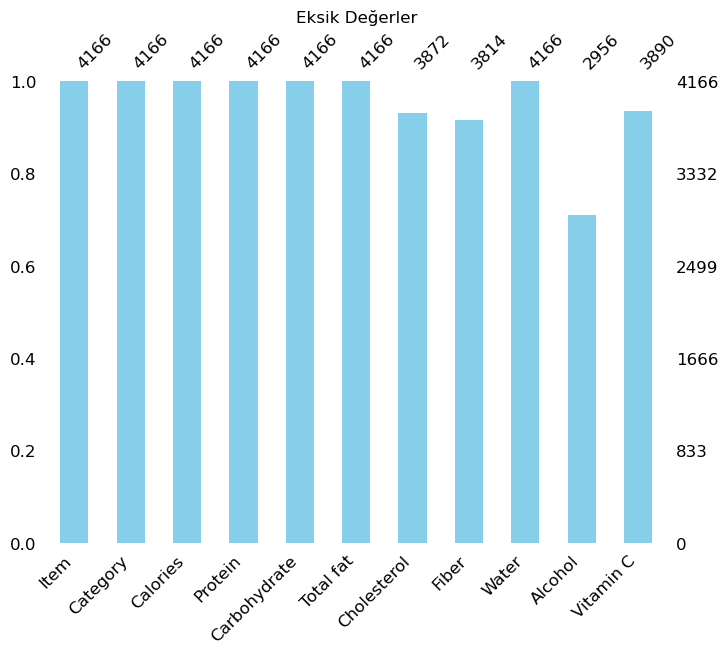

In [7]:
#Eksik değerlerin görselleştirilmesi
msno.bar(df, figsize=(8, 6), color='skyblue', fontsize=12)
plt.title('Eksik Değerler')
plt.show()

# SÜTUN TİPLERİ VE İSİMLERİ DEĞİŞTİRME

In [8]:
for index, value in df['Vitamin C'].items():
    if isinstance(value, str) and 'mg' in value:
        df.at[index, 'Vitamin C'] = value.replace(' mg', '')
df["Vitamin C"]=df["Vitamin C"].astype(float)
df = df.rename(columns={'Vitamin C': 'Vitamin C (mg)'})

In [9]:
for index, value in df["Water"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Water"] = value.replace(' g', '')
df["Water"]=df["Water"].astype(float)
df = df.rename(columns={"Water": "Water (g)"})

In [10]:
for index, value in df["Alcohol"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Alcohol"] = value.replace(' g', '')
df["Alcohol"]=df["Alcohol"].astype(float)
df = df.rename(columns={"Alcohol": "Alcohol (g)"})

In [11]:
for index, value in df["Fiber"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Fiber"] = value.replace(' g', '')
df["Fiber"]=df["Fiber"].astype(float)
df = df.rename(columns={"Fiber": "Fiber (g)"})

In [12]:
for index, value in df["Cholesterol"].items():
    if isinstance(value, str) and 'mg' in value:
        df.at[index, "Cholesterol"] = value.replace(' mg', '')
df["Cholesterol"]=df["Cholesterol"].astype(float)
df = df.rename(columns={"Cholesterol": "Cholesterol (mg)"})

In [13]:
for index, value in df["Total fat"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Total fat"] = value.replace(' g', '')
df["Total fat"]=df["Total fat"].astype(float)
df = df.rename(columns={"Total fat": "Total_fat (g)"})

In [14]:
for index, value in df["Carbohydrate"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Carbohydrate"] = value.replace(' g', '')
df["Carbohydrate"]=df["Carbohydrate"].astype(float)
df = df.rename(columns={"Carbohydrate": "Carbohydrate (g)"})

In [15]:
for index, value in df["Protein"].items():
    if isinstance(value, str) and 'g' in value:
        df.at[index, "Protein"] = value.replace(' g', '')
df["Protein"]=df["Protein"].astype(float)
df = df.rename(columns={"Protein": "Protein (g)"})

In [16]:
for index, value in df["Calories"].items():
    if isinstance(value, str) and 'kcal' in value:
        df.at[index, "Calories"] = value.replace(' kcal', '')
df["Calories"]=df["Calories"].astype(float)
df = df.rename(columns={"Calories": "Calories (kcal)"})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 167512 to 168362
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item              4166 non-null   object 
 1   Category          4166 non-null   object 
 2   Calories (kcal)   4166 non-null   float64
 3   Protein (g)       4166 non-null   float64
 4   Carbohydrate (g)  4166 non-null   float64
 5   Total_fat (g)     4166 non-null   float64
 6   Cholesterol (mg)  3872 non-null   float64
 7   Fiber (g)         3814 non-null   float64
 8   Water (g)         4166 non-null   float64
 9   Alcohol (g)       2956 non-null   float64
 10  Vitamin C (mg)    3890 non-null   float64
dtypes: float64(9), object(2)
memory usage: 519.6+ KB


In [18]:
df.shape
nrow=df.shape[0]
ncol=df.shape[1]
nrow,ncol=df.shape
print("Satır Sayısı:", nrow)
print("Sütun Sayısı:", ncol)

Satır Sayısı: 4166
Sütun Sayısı: 11


In [19]:
df.describe()

,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
count,4166.000000,4166.000000,4166.000000,4166.000000,3872.000000,3814.000000,4166.000000,2956.000000,3890.000000
mean,228.715795,8.710583,22.626500,11.641534,35.446023,1.734898,55.165540,0.313836,12.258689
std,195.020692,10.131239,26.859411,19.188625,106.300392,3.470929,32.490975,2.510817,83.900787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,1.352500,1.912500,0.370000,0.000000,0.000000,26.705000,0.000000,0.000000
50%,176.000000,4.540000,9.400000,4.145000,0.000000,0.600000,65.040000,0.000000,0.400000
75%,357.000000,13.182500,42.960000,15.000000,55.250000,2.300000,83.397500,0.000000,7.875000
max,902.000000,85.600000,100.000000,100.000000,2552.000000,77.300000,100.000000,42.500000,2732.000000


# ALKOL SÜTUNUNU DOLDURMA

In [20]:
df["Category"].value_counts()

Vegetables and Vegetable Products      814
Baked Products                         517
Poultry Products                       383
Beverages                              366
Sweets                                 358
Baby Foods                             345
Dairy and Egg Products                 291
Pork Products                          259
Fats and Oils                          216
Snacks                                 176
Sausages and Luncheon Meats            167
American Indian/Alaska Native Foods    165
Restaurant Foods                       109
Name: Category, dtype: int64

In [21]:
df.groupby("Category")["Alcohol (g)"].mean()

Category
American Indian/Alaska Native Foods    0.000000
Baby Foods                             0.000000
Baked Products                         0.000000
Beverages                              3.060726
Dairy and Egg Products                 0.000000
Fats and Oils                          0.000000
Pork Products                          0.000000
Poultry Products                       0.000000
Restaurant Foods                       0.000000
Sausages and Luncheon Meats            0.000000
Snacks                                 0.000000
Sweets                                 0.001210
Vegetables and Vegetable Products      0.000000
Name: Alcohol (g), dtype: float64

In [22]:
df.loc[df["Category"]=="American Indian/Alaska Native Foods", "Alcohol (g)"] = df[df["Category"]=="American Indian/Alaska Native Foods"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Baby Foods", "Alcohol (g)"] = df[df["Category"]=="Baby Foods"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Baked Products", "Alcohol (g)"] = df[df["Category"]=="Baked Products"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Dairy and Egg Products", "Alcohol (g)"] = df[df["Category"]=="Dairy and Egg Products"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Fats and Oils", "Alcohol (g)"] = df[df["Category"]=="Fats and Oils"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Pork Products", "Alcohol (g)"] = df[df["Category"]=="Pork Products"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Poultry Products", "Alcohol (g)"] = df[df["Category"]=="Poultry Products"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Restaurant Foods", "Alcohol (g)"] = df[df["Category"]=="Restaurant Foods"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Sausages and Luncheon Meats", "Alcohol (g)"] = df[df["Category"]=="Sausages and Luncheon Meats"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Snacks", "Alcohol (g)"] = df[df["Category"]=="Snacks"]["Alcohol (g)"].fillna(0)
df.loc[df["Category"]=="Vegetables and Vegetable Products", "Alcohol (g)"] = df[df["Category"]=="Vegetables and Vegetable Products"]["Alcohol (g)"].fillna(0)

In [23]:
df[df["Category"] == "Sweets"].isnull().sum()

Item                  0
Category              0
Calories (kcal)       0
Protein (g)           0
Carbohydrate (g)      0
Total_fat (g)         0
Cholesterol (mg)      5
Fiber (g)             3
Water (g)             0
Alcohol (g)         110
Vitamin C (mg)        7
dtype: int64

In [24]:
df[(df["Category"] == "Sweets") & (df["Alcohol (g)"] > 0.0)]

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
168782,"""Puddings, rice, ready-to-eat""",Sweets,108.0,3.23,18.39,2.15,12.0,0.3,75.15,0.3,1.3


In [25]:
df.loc[df["Category"]=="Sweets", "Alcohol (g)"] = df[df["Category"]=="Sweets"]["Alcohol (g)"].fillna(0)

In [26]:
df[df["Category"] == "Beverages"].isnull().sum()

Item                 0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrate (g)     0
Total_fat (g)        0
Cholesterol (mg)    58
Fiber (g)           50
Water (g)            0
Alcohol (g)         63
Vitamin C (mg)      42
dtype: int64

In [27]:
df[(df["Category"] == "Beverages") & (df["Alcohol (g)"] >0)]

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
167723,"""Alcoholic beverage, rice (sake)""",Beverages,134.0,0.50,5.00,0.00,0.0,0.0,78.40,16.1,0.0
168746,"""Alcoholic beverage, beer, regular, all""",Beverages,43.0,0.46,3.55,0.00,0.0,0.0,91.96,3.9,0.0
168747,"""Alcoholic beverage, beer, regular, BUDWEISER""",Beverages,41.0,0.36,2.97,0.00,0.0,0.0,92.77,3.9,NaN
168748,"""Alcoholic beverage, beer, light, BUDWEISER SELECT""",Beverages,28.0,0.20,0.87,0.00,0.0,0.0,95.30,3.4,NaN
168749,"""Alcoholic beverage, beer, light""",Beverages,29.0,0.24,1.64,0.00,0.0,0.0,94.88,3.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
174849,"""Alcoholic beverage, wine, table, white, Muscat""",Beverages,82.0,0.07,5.23,0.00,NaN,NaN,85.69,8.8,NaN
174863,"""Malt beverage, includes non-alcoholic beer""",Beverages,37.0,0.21,8.05,0.12,0.0,0.0,91.15,0.3,0.5
175097,"""Alcoholic beverage, liqueur, coffee, 53 proof""",Beverages,336.0,0.10,46.80,0.30,0.0,0.0,31.00,21.7,0.0


# VİTAMİN C SÜTUNU DOLDURMA

In [28]:
df.groupby("Category")["Vitamin C (mg)"].mean()

Category
American Indian/Alaska Native Foods    12.646392
Baby Foods                             27.623754
Baked Products                          0.346517
Beverages                              33.689815
Dairy and Egg Products                  1.769930
Fats and Oils                           0.245320
Pork Products                           1.324324
Poultry Products                        1.025587
Restaurant Foods                        2.940385
Sausages and Luncheon Meats             3.471341
Snacks                                 19.545143
Sweets                                  5.200000
Vegetables and Vegetable Products      23.099506
Name: Vitamin C (mg), dtype: float64

In [29]:
df["Vitamin C (mg)"].isnull().sum()

276

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Vitamin C (mg)'] = imputer.fit_transform(df[['Vitamin C (mg)']])
df["Vitamin C (mg)"].isnull().sum()

0

# Cholestrol Boşluk Doldurma

In [31]:
imputer = SimpleImputer(strategy='mean')

In [32]:
df['Cholesterol (mg)'] = imputer.fit_transform(df[['Cholesterol (mg)']])

In [33]:
df["Cholesterol (mg)"].isnull().sum()

0

# Fiber Boşluk Doldurma

In [34]:
imputer = SimpleImputer(strategy='mean')

In [35]:
df['Fiber (g)'] = imputer.fit_transform(df[['Fiber (g)']])

In [36]:
df["Fiber (g)"].isnull().sum()

0

# HANGİ SATIRLARDA MEYVE VAR ONU BULUR.

In [37]:
fruit_list =["apple", "pear", "orange", "tangerine", "banana", "grape", "strawberry", "cherry", "watermelon", "cantaloupe", "plum", "peach", "pomegranate", "lemon",
             "pineapple", "sour cherry", "mulberry", "coconut", "avocado", "mango", "apricot", "kiwi", "fig", "raspberry", "blackberry", "date", "guava", "grapefruit",
             "blueberry", "passion fruit", "lychee", "dragon fruit", "papaya", "lime", "nectarine", "persimmon", "quince", "star fruit", "elderberry", "boysenberry",
             "cranberry", "gooseberry"]

fruit_set = set(fruit_list)

meyve_set = set()
for index, row in df.iterrows():
    items_sutunu = row['Item'].split(', ')
    meyve_set.update(meyve for meyve in items_sutunu if meyve in fruit_set)

meyve_liste = list(meyve_set)
meyve_liste

['mango',
 'lemon',
 'blueberry',
 'orange',
 'strawberry',
 'apple',
 'grape',
 'pineapple',
 'peach',
 'cherry',
 'raspberry',
 'banana',
 'apricot',
 'coconut']

In [38]:
# Meyveleri içeren ayrı bir DataFrame oluşturur.

In [39]:
fruit_df = df[df['Item'].str.contains("Grape|Blueberry|Cherry|Apricot|Pineapple|Coconut|Banana|Raspberry|Apple|Lemon|Orange|Peach|Strawberry|Mango", case=False, regex=True)]
fruit_df

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
167522,"""Pie, Dutch Apple, Commercially Prepared""",Baked Products,290.0,2.17,44.54,11.50,0.000000,1.600000,41.09,0.0,5.700000
167927,"""Toaster Pastries, fruit, frosted (include apples, blueberry, cherry, strawberry)""",Baked Products,385.0,4.01,71.83,9.02,0.000000,1.800000,14.04,0.0,0.000000
167928,"""Toaster pastries, fruit, toasted (include apple, blueberry, cherry, strawberry)""",Baked Products,409.0,4.70,72.70,11.03,35.446023,1.000000,10.46,0.0,0.000000
167929,"""Muffin, blueberry, commercially prepared, low-fat""",Baked Products,255.0,4.23,50.05,4.22,28.000000,4.200000,39.94,0.0,0.900000
168002,"""Glutino, Gluten Free Wafers, Lemon Flavored""",Baked Products,515.0,0.00,74.39,24.18,35.446023,0.000000,1.12,0.0,12.258689
...,...,...,...,...,...,...,...,...,...,...,...
173517,"""Babyfood, apples with ham, strained""",Baby Foods,62.0,2.60,10.90,0.90,8.000000,1.800000,85.30,0.0,0.100000
173530,"""Babyfood, cereal, mixed, with bananas, prepared with whole milk""",Baby Foods,86.0,3.82,10.00,3.46,10.000000,0.400000,81.81,0.0,0.400000
173533,"""Babyfood, cereal, high protein, with apple and orange, prepared with whole milk""",Baby Foods,112.0,6.90,13.40,3.90,35.446023,1.734898,74.40,0.0,12.258689


# 1. Sorunun cevabı "fruit," kullarak 40+ raw için manuel kontrol ile maks vitc bulma

In [40]:
ab=df[df['Item'].str.contains("fruit,", case=False, regex=True)]
ab.sort_values("Vitamin C (mg)", ascending=False)

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
171350,"""Babyfood, fruit, papaya and applesauce with tapioca, strained""",Baby Foods,70.0,0.20,18.90,0.10,35.446023,1.400000,80.60,0.0,113.1
171348,"""Babyfood, fruit, guava and papaya with tapioca, strained""",Baby Foods,63.0,0.20,17.00,0.10,35.446023,1.734898,82.50,0.0,80.9
171337,"""Babyfood, fruit, peaches, junior""",Baby Foods,65.0,0.94,14.48,0.33,0.000000,1.300000,83.65,0.0,46.1
171336,"""Babyfood, fruit, peaches, strained""",Baby Foods,65.0,0.94,14.48,0.33,0.000000,1.300000,83.65,0.0,46.1
170949,"""Babyfood, fruit, applesauce and cherries, strained""",Baby Foods,51.0,0.00,14.10,0.00,0.000000,1.100000,85.63,0.0,42.8
170950,"""Babyfood, fruit, applesauce and cherries, junior""",Baby Foods,51.0,0.00,14.10,0.00,0.000000,1.100000,85.60,0.0,42.8
173512,"""Babyfood, fruit, applesauce, strained""",Baby Foods,41.0,0.20,10.80,0.20,0.000000,1.700000,88.60,0.0,38.3
172278,"""Babyfood, fruit, applesauce, junior""",Baby Foods,37.0,0.00,10.30,0.00,0.000000,1.700000,89.50,0.0,37.8
171346,"""Babyfood, fruit, apple and raspberry, junior""",Baby Foods,58.0,0.20,15.40,0.20,0.000000,2.100000,84.00,0.0,28.9


In [41]:
def findMaxOfVitC(str):
  return ab[ab["Item"].str.contains(str,case=False,regex=True)]["Vitamin C (mg)"].max()
maxsOfVitC=pd.DataFrame([findMaxOfVitC("papaya"), findMaxOfVitC("guava"),findMaxOfVitC("peaches"), findMaxOfVitC("pineapple"),findMaxOfVitC("banana"),findMaxOfVitC("cherries") + findMaxOfVitC("cherry") ,findMaxOfVitC("applesauce") , findMaxOfVitC("prunes"),findMaxOfVitC("plums"),findMaxOfVitC("pears"),findMaxOfVitC("apricot") ,findMaxOfVitC("tutti frutti"), findMaxOfVitC("raspberry"), findMaxOfVitC("lemon"),findMaxOfVitC("raisin"), findMaxOfVitC("cinnamon"), findMaxOfVitC("strawberry"),findMaxOfVitC("blueberry"), findMaxOfVitC("apple ")   ])
maxsOfVitC.index=["papaya","guava","peache","pineapple","banana","cherries","applesauce","prunes","plums","pears","apricot","tutti frutti", "raspberry", "lemon", "raisin", "cinnamon","strawberry","blueberry","apple"]
maxsOfVitC.columns=["Vitamin C (mg)"]
maxsOfVitC.sort_values("Vitamin C (mg)",ascending=False)

,Vitamin C (mg)
papaya,113.1
applesauce,113.1
guava,80.9
peache,46.1
cherries,42.8
raspberry,28.9
apple,28.9
pineapple,28.1
blueberry,27.8
pears,27.5


### En yüksek Vitamin C yi meyvelerde papaya içermektedir.

## En çok C vitamini içeren meyve ve diğer C vitamini kaynakları

In [42]:
ab = df[df["Item"].str.contains("fruit,",case=False,regex=True)]
ab.sort_values("Vitamin C (mg)", ascending=False)

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
171350,"""Babyfood, fruit, papaya and applesauce with tapioca, strained""",Baby Foods,70.0,0.20,18.90,0.10,35.446023,1.400000,80.60,0.0,113.1
171348,"""Babyfood, fruit, guava and papaya with tapioca, strained""",Baby Foods,63.0,0.20,17.00,0.10,35.446023,1.734898,82.50,0.0,80.9
171337,"""Babyfood, fruit, peaches, junior""",Baby Foods,65.0,0.94,14.48,0.33,0.000000,1.300000,83.65,0.0,46.1
171336,"""Babyfood, fruit, peaches, strained""",Baby Foods,65.0,0.94,14.48,0.33,0.000000,1.300000,83.65,0.0,46.1
170949,"""Babyfood, fruit, applesauce and cherries, strained""",Baby Foods,51.0,0.00,14.10,0.00,0.000000,1.100000,85.63,0.0,42.8
170950,"""Babyfood, fruit, applesauce and cherries, junior""",Baby Foods,51.0,0.00,14.10,0.00,0.000000,1.100000,85.60,0.0,42.8
173512,"""Babyfood, fruit, applesauce, strained""",Baby Foods,41.0,0.20,10.80,0.20,0.000000,1.700000,88.60,0.0,38.3
172278,"""Babyfood, fruit, applesauce, junior""",Baby Foods,37.0,0.00,10.30,0.00,0.000000,1.700000,89.50,0.0,37.8
171346,"""Babyfood, fruit, apple and raspberry, junior""",Baby Foods,58.0,0.20,15.40,0.20,0.000000,2.100000,84.00,0.0,28.9


In [43]:
# Diğer C vitamini kaynakları

In [44]:
a=df["Vitamin C (mg)"]>=233 # Diğer kaynakların Min C vitamini değeri eşiği
b=df.loc[~df['Item'].str.contains("fruit,", case=False, regex=True) & a]
b.sort_values("Vitamin C (mg)", ascending=False)

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
173487,"""Babyfood, GERBER, 2nd Foods, apple, carrot and squash, organic""",Baby Foods,64.0,1.10,14.82,0.00,2.000000,1.2,83.83,0.0,2732.0
167707,"""Beverages, fruit-flavored drink, powder, with high vitamin C with other added vitamins, low calorie""",Beverages,227.0,0.25,91.00,0.16,0.000000,2.2,1.32,0.0,2400.0
173237,"""Beverages, Orange-flavor drink, breakfast type, low calorie, powder""",Beverages,217.0,3.60,85.90,0.00,0.000000,3.8,1.80,0.0,2400.0
169373,"""Peppers, sweet, red, freeze-dried""",Vegetables and Vegetable Products,314.0,17.90,68.70,3.00,0.000000,21.3,2.00,0.0,1900.0
174143,"""Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C""",Beverages,378.0,0.00,94.45,0.00,0.000000,0.0,5.09,0.0,1342.3
170075,"""Chives, freeze-dried""",Vegetables and Vegetable Products,311.0,21.20,64.29,3.50,0.000000,26.2,2.00,0.0,660.0
167681,"""Beverages, fruit-flavored drink, dry powdered mix, low calorie, with aspartame""",Beverages,218.0,0.45,87.38,0.04,0.000000,0.1,1.84,0.0,560.0
169692,"""Gelatin desserts, dry mix, reduced calorie, with aspartame, added phosphorus, potassium, sodium, vitamin C""",Sweets,345.0,55.30,33.30,0.00,0.000000,0.0,6.70,0.0,490.0
173136,"""Formulated bar, MARS SNACKFOOD US, SNICKERS MARATHON Energy Bar, all flavors""",Snacks,386.0,21.91,50.30,10.79,4.000000,6.7,14.00,0.0,489.9


# 2. Soru Cevabı Negatif Korelasyon vardır.

In [45]:
korelasyon = df['Water (g)'].corr(df['Calories (kcal)'])
korelasyon

-0.9002595501988964

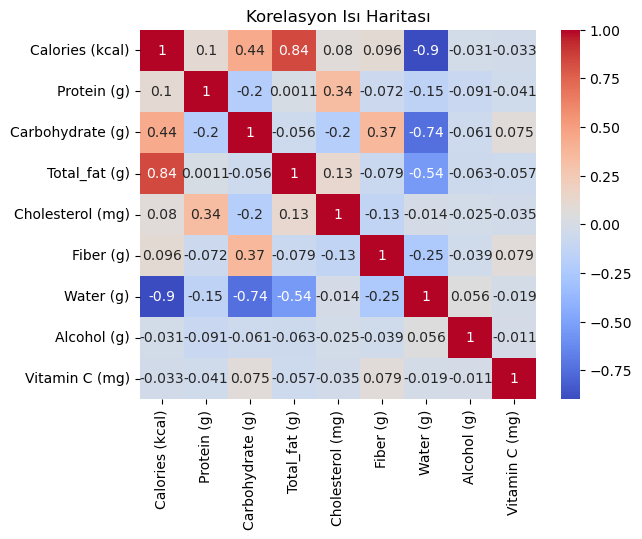

In [46]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
korelasyon_matrisi = numeric_df.corr()
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('Korelasyon Isı Haritası')
plt.show()

In [47]:
import statsmodels.api as sm
y=df["Calories (kcal)"]
x1=df["Water (g)"]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories (kcal)   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:01:14   Log-Likelihood:                -24414.
No. Observations:                4166   AIC:                         4.883e+04
Df Residuals:                    4164   BIC:                         4.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        526.8100      2.593    203.203      0.000     521.727     531.893
Water (g)     -5.4036      0.040   -133.438      0.000      -5.483      -5.324
==============================================================================
Omnibus:                     1826.740   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16553.901
Skew:                           1.858   Prob(JB):                         0.00
Kurtosis:                      12.031   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

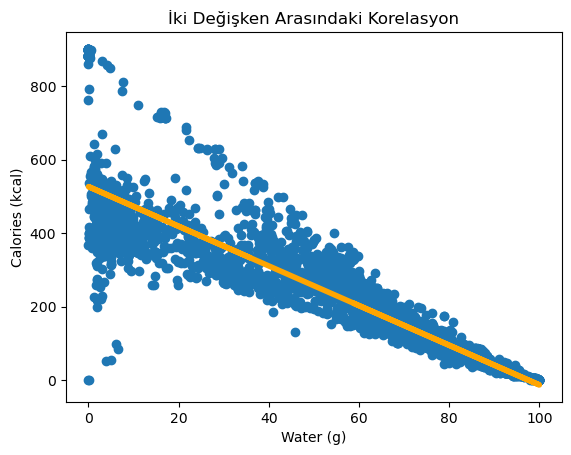

In [48]:
plt.scatter(x1,y)
y_hat=526.8100+(x1*-5.4036)
fig = plt.plot(x1,y_hat, lw=4, c= "orange", label = "regression line")
plt.xlabel("Water (g)")
plt.ylabel("Calories (kcal)")
plt.title('İki Değişken Arasındaki Korelasyon')
plt.show()

### Sıfır karbonhidrat diyeti yapan bir bireyin yediği besinler ve yapmayan birinin yediği besinlerin karşılaştırılması

C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\1153578556.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_avg=df.drop("Carbohydrate (g)",axis=1).mean()
C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\1153578556.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_car_avg=df[df["Carbohydrate (g)"] == 0].drop("Carbohydrate (g)",axis=1).mean()


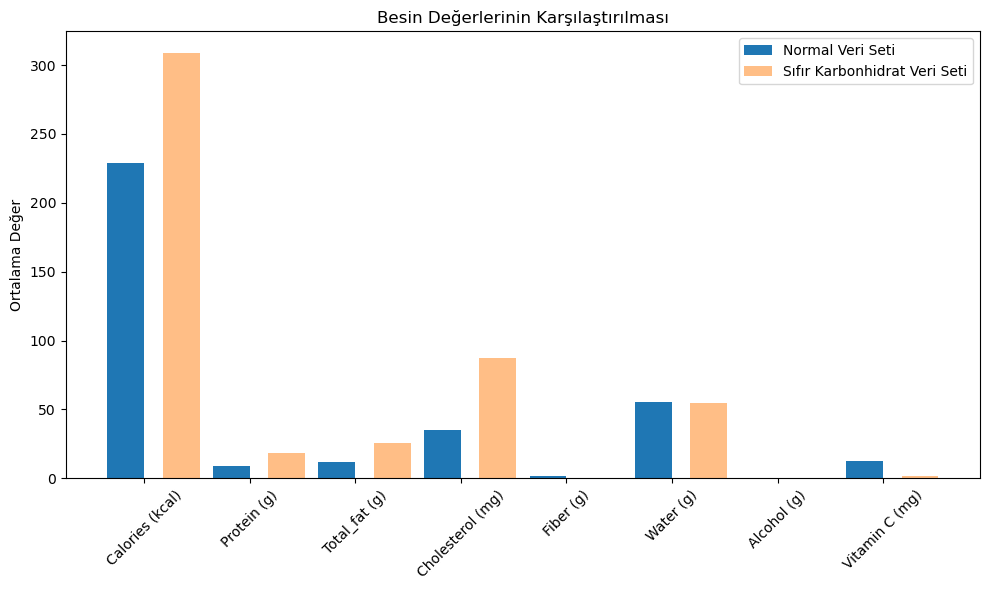

In [49]:
normal_avg=df.drop("Carbohydrate (g)",axis=1).mean()
zero_car_avg=df[df["Carbohydrate (g)"] == 0].drop("Carbohydrate (g)",axis=1).mean()
categorys=list(normal_avg.index)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
categories = np.arange(len(normal_avg))
bar1 = ax.bar(categories - bar_width/2, normal_avg, bar_width, label='Normal Veri Seti')
bar2 = ax.bar(categories + bar_width/2, zero_car_avg,bar_width, label='Sıfır Karbonhidrat Veri Seti', align='edge',alpha=0.5)
ax.set_xticks(range(len(categorys)))
ax.set_xticklabels(categorys, rotation=45)
ax.set_ylabel('Ortalama Değer')
ax.set_title('Besin Değerlerinin Karşılaştırılması')
ax.legend()
plt.tight_layout()


In [50]:
fazla_protein = df[df["Protein (g)"] > 30]
fazla_protein

,Item,Category,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Cholesterol (mg),Fiber (g),Water (g),Alcohol (g),Vitamin C (mg)
FDC_ID,,,,,,,,,,,
175043,"""Leavening agents, yeast, baker's, active dry""",Baked Products,325.0,40.44,41.22,7.61,0.0,26.900000,5.08,0.0,0.3
167536,"""Snacks, beef jerky, chopped and formed""",Snacks,410.0,33.20,11.00,25.60,48.0,1.800000,23.36,0.0,0.0
167961,"""Snacks, pork skins, plain""",Snacks,544.0,61.30,0.00,31.30,95.0,0.000000,1.80,0.0,0.5
168851,"""Snacks, pork skins, barbecue-flavor""",Snacks,538.0,57.90,1.60,31.80,115.0,1.734898,2.10,0.0,1.5
173158,"""Formulated Bar, SOUTH BEACH protein bar""",Snacks,412.0,30.34,38.40,15.17,3.0,7.300000,12.16,0.0,27.9
...,...,...,...,...,...,...,...,...,...,...,...
168294,"""Pork, fresh, loin, top loin (chops), boneless, separable lean only, cooked, pan-fried""",Pork Products,172.0,30.46,0.00,4.62,69.0,0.000000,64.81,0.0,0.0
168311,"""Pork, fresh, loin, sirloin (roasts), boneless, separable lean only, cooked, roasted""",Pork Products,178.0,30.39,0.00,5.31,84.0,0.000000,64.07,0.0,0.0
168313,"""Pork, fresh, loin, tenderloin, separable lean only, cooked, broiled""",Pork Products,187.0,30.42,0.00,6.33,94.0,0.000000,62.30,0.0,1.0


### Normal bir insanın bir öğünde alması gereken protein miktarı 20-30 gram arasında olmalıdır. 30 gram üzerisi fazla proteine girmektedir

C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\176879690.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  protein_normal_avg=df.mean()
C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\176879690.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_pro_avg=fazla_protein.mean()


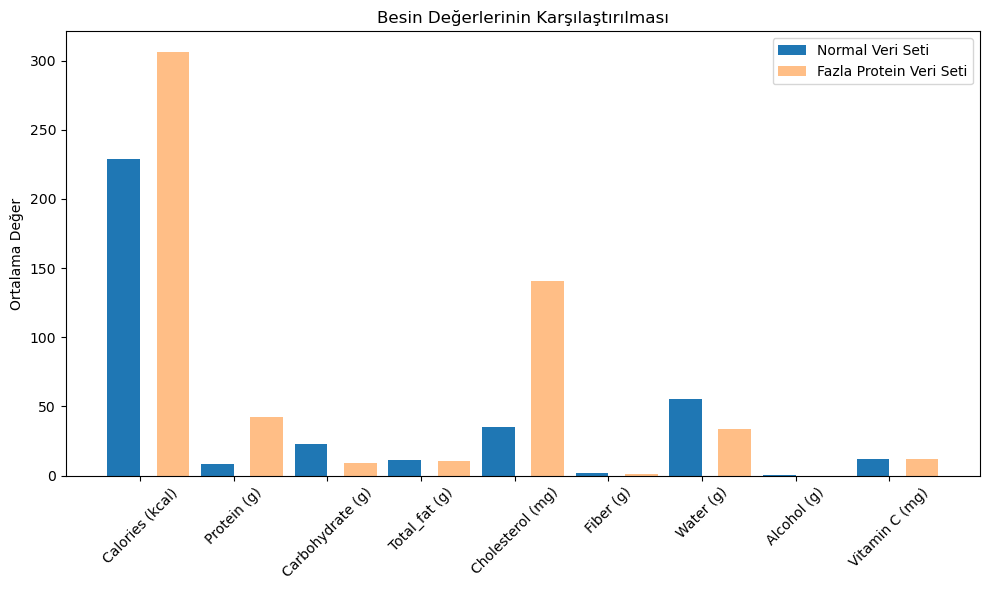

In [51]:
protein_normal_avg=df.mean()
zero_pro_avg=fazla_protein.mean()
categorys=list(protein_normal_avg.index)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
categories = np.arange(len(protein_normal_avg))
bar1 = ax.bar(categories - bar_width/2, protein_normal_avg, bar_width, label='Normal Veri Seti')
bar2 = ax.bar(categories + bar_width/2, zero_pro_avg,bar_width, label='Fazla Protein Veri Seti', align='edge',alpha=0.5)
ax.set_xticks(range(len(categorys)))
ax.set_xticklabels(categorys, rotation=45)
ax.set_ylabel('Ortalama Değer')
ax.set_title('Besin Değerlerinin Karşılaştırılması')
ax.legend()
plt.tight_layout()


### Cleveland Clinic web sitesine göre, bir gram yağ yaklaşık 9 kilokalori, bir gram protein ve bir gram karbonhidrat ise 4'er kilokalori içerir. Bu tahminlerin verilerle uyumlu olup olmadığını test etmek için doğrusal bir model kurun.


In [52]:
# Kalori hesaplama fonksiyonu
def calculate_calories(row):
    return (row['Protein (g)'] * 4) + (row['Carbohydrate (g)'] * 4) + (row['Total_fat (g)'] * 9)

# Yeni sütunu ekleyerek DataFrame'i güncelleme
df['Real_Cal'] = df.apply(calculate_calories, axis=1)

# Model DataFrame'i oluşturma
df_model = df[['Calories (kcal)', 'Protein (g)', 'Carbohydrate (g)', 'Total_fat (g)', 'Real_Cal']]

df_model


,Calories (kcal),Protein (g),Carbohydrate (g),Total_fat (g),Real_Cal
FDC_ID,,,,,
167512,307.0,5.88,41.18,13.24,307.40
167513,330.0,4.34,53.42,11.27,332.47
167514,377.0,6.10,79.80,3.70,376.90
167515,232.0,8.00,46.00,1.80,232.20
167516,273.0,6.58,41.05,9.22,273.50
...,...,...,...,...,...
168358,177.0,21.61,0.41,9.85,176.73
168359,181.0,25.48,0.70,8.48,181.04
168360,130.0,24.36,0.00,3.59,129.75


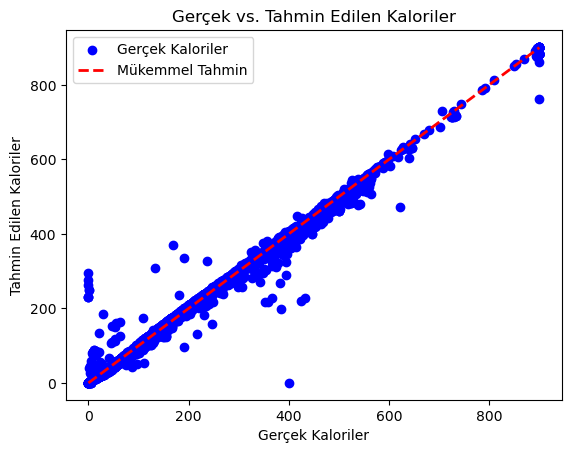

In [53]:
plt.scatter(df_model['Real_Cal'], df_model['Calories (kcal)'], label='Gerçek Kaloriler', c='blue')
plt.plot([df_model['Real_Cal'].min(), df_model['Real_Cal'].max()],
         [df_model['Real_Cal'].min(), df_model['Real_Cal'].max()], '--', color='red', linewidth=2, label='Mükemmel Tahmin')
plt.xlabel('Gerçek Kaloriler')
plt.ylabel('Tahmin Edilen Kaloriler')
plt.legend()
plt.title('Gerçek vs. Tahmin Edilen Kaloriler')
plt.show()

In [54]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn import metrics
r2_degeri = metrics.r2_score(df_model["Real_Cal"],df_model["Calories (kcal)"])

# MSE ve RMSE değerleri
mse_degeri = metrics.mean_squared_error(df_model["Real_Cal"],df_model["Calories (kcal)"])
rmse_degeri = np.sqrt(mse_degeri)

print(f'R-squared (R2): {r2_degeri}')
print(f'Mean Squared Error (MSE): {mse_degeri}')
print(f'Root Mean Squared Error (RMSE): {rmse_degeri}')

R-squared (R2): 0.9900816522817978
Mean Squared Error (MSE): 388.4175362698032
Root Mean Squared Error (RMSE): 19.708311350032076


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
X=df_model.loc[:,["Protein (g)","Carbohydrate (g)","Total_fat (g)"]].values
y=df_model.loc[:,"Calories (kcal)"].values.reshape(-1,1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42,shuffle=True)

In [59]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_test= lr.predict(X_test)
y_pred_train=lr.predict(X_train)
y_true = y_test

In [60]:
mse = metrics.mean_squared_error(y_true, y_pred_test)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_true, y_pred_test)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 6432.841880597647
Root Mean Squared Error (RMSE): 80.20499909979208
R-squared (R2): 0.8228289307082204


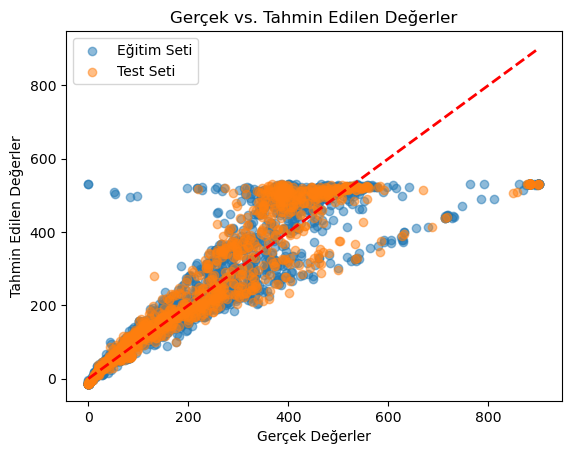

In [61]:
plt.scatter(y_train, y_pred_train, label='Eğitim Seti', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Test Seti', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', linewidth=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

# Stasmodel ile çoklu regresyon  

In [62]:
y=df["Calories (kcal)"]
x1=df[["Protein (g)","Carbohydrate (g)","Total_fat (g)"]]

In [63]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()

In [64]:
print("Katsayılar:")
print(results.params)

Katsayılar:
const               2.959282
Protein (g)         4.058511
Carbohydrate (g)    3.851515
Total_fat (g)       8.869811
dtype: float64


In [65]:
# R-squared değeri
r_squared = results.rsquared
print("R-squared:", r_squared)

# Adjusted R-squared değeri
adjusted_r_squared = results.rsquared_adj
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.9904241594117287
Adjusted R-squared: 0.990417257075889


In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories (kcal)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.435e+05
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:01:15   Log-Likelihood:                -18196.
No. Observations:                4166   AIC:                         3.640e+04
Df Residuals:                    4162   BIC:                         3.642e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9593      0.534      5.540      0.000       1.912       4.007
Protein (g)          4.0585      0.030    136.099      0.000       4.000       4.117
Carbohydrate (g)     3.8515      0.011    341.875      0.000       3.829       3.874
Total_fat (g)        8.8698      0.015    574.418      0.000       8.840       8.900
==============================================================================
Omnibus:                     3211.870   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2439237.713
Skew:                           2.396   Prob(JB):                         0.00
Kurtosis:                     121.445   Cond. No.                         65.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Support Vector Regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Mean Squared Error: 6502.934580728067
0.8208984622057829


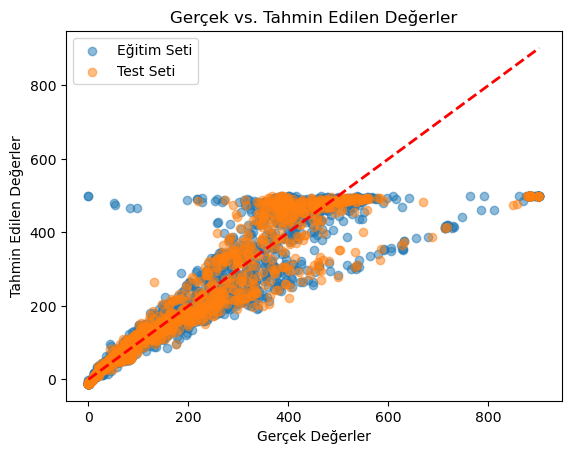

In [68]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train, y_train)

# Test setini kullanarak tahmin yapma
y_pred_test=svr_model.predict(X_test)
y_pred_train=svr_model.predict(X_train)

y_true = y_test

mse = mean_squared_error(y_true, y_pred_test)
print("SVR Mean Squared Error:", mse)

print(metrics.r2_score(y_true,y_pred_test))

plt.scatter(y_train, y_pred_train, label='Eğitim Seti', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Test Seti', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', linewidth=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [69]:
#Decision Trees and Random Forest

Decision Tree Mean Squared Error: 4480.213676639835
0.8766075301586319


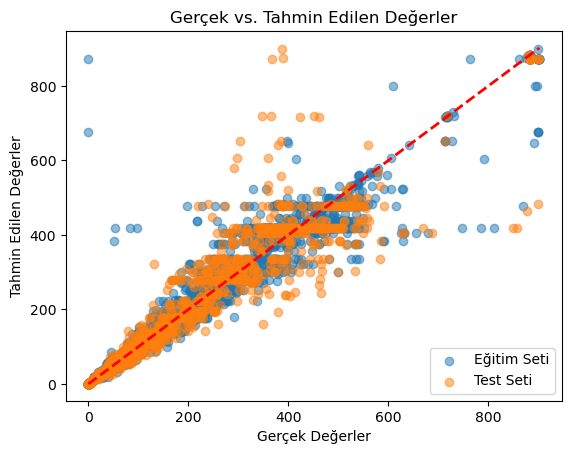

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_test = dt_model.predict(X_test)
y_pred_train=dt_model.predict(X_train)
y_true=y_test
# Model performansını değerlendirme
mse = mean_squared_error(y_true, y_pred_test)
print("Decision Tree Mean Squared Error:", mse)
print(metrics.r2_score(y_true,y_pred_test))

plt.scatter(y_train, y_pred_train, label='Eğitim Seti', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Test Seti', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', linewidth=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_rf_test = rf_model.predict(X_test)
y_true=y_test
# Model performansını değerlendirme
mse_rf = mean_squared_error(y_true, y_pred_rf_test)
print("Random Forest Mean Squared Error:", mse_rf)
print(metrics.r2_score(y_test,y_pred_rf_test))

C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\2047848641.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Mean Squared Error: 3476.905331685452
0.9042402958327074


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = gb_model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Mean Squared Error:", mse)

print(metrics.r2_score(y_test,y_pred))

Gradient Boosting Mean Squared Error: 3676.8316839168897


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8987339945335437


# Gıdalardaki gizli kalori kaynaklarının neler olabileceğini görmek için doğrusal modelinizin hatalarını analiz edin.

C:\Users\Mete Berk\AppData\Local\Temp\ipykernel_14640\2679840144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Artik'] = df_model['Real_Cal'] - df_model['Calories (kcal)']


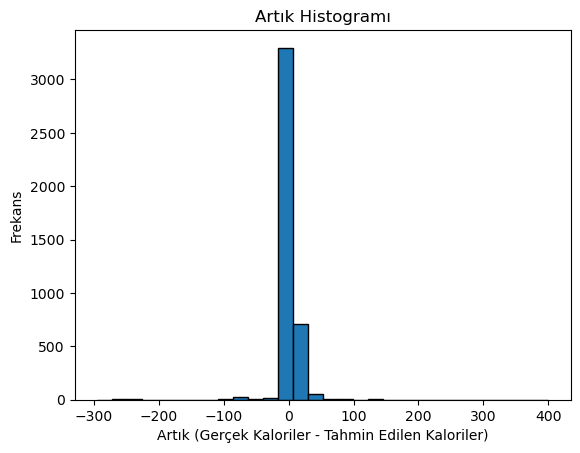

In [73]:
# Artıkları hesapla
df_model['Artik'] = df_model['Real_Cal'] - df_model['Calories (kcal)']

# Histogram çizimi
plt.hist(df_model['Artik'], bins=30, edgecolor='black')
plt.xlabel('Artık (Gerçek Kaloriler - Tahmin Edilen Kaloriler)')
plt.ylabel('Frekans')
plt.title('Artık Histogramı')
plt.show()

In [74]:
# Artık analizi

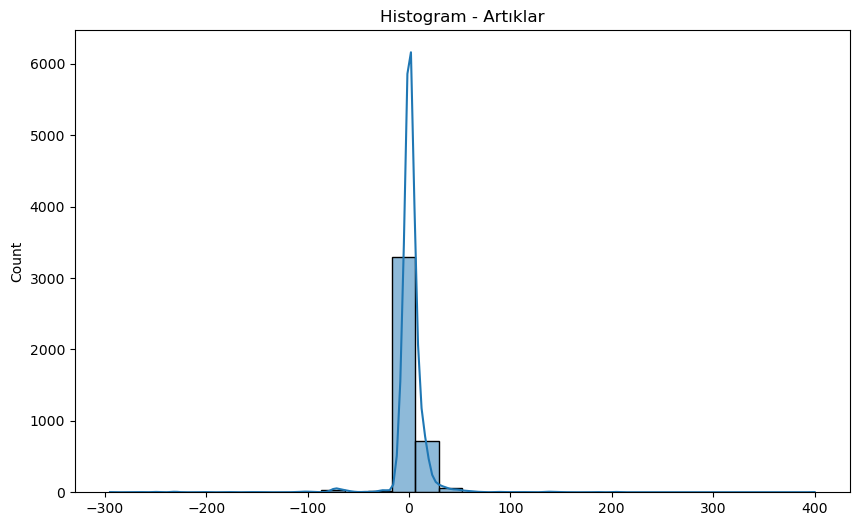

In [75]:
# Gerçek kaloriler ve tahmin edilen kaloriler
real_calories = df_model["Real_Cal"]
predicted_calories = df_model["Calories (kcal)"]

# Artıkları hesapla
residuals = real_calories - predicted_calories

# Histogram grafiği
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True,bins=30)
plt.title('Histogram - Artıklar')
plt.show()
